<a href="https://colab.research.google.com/github/yehorn0/obr_zobr_3/blob/master/lab5/Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Lab 5**

1.   Image Fragmentation
2.   Image Fusing


Imports

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
from PIL import Image
from io import BytesIO

##1. Image Fragment
Define function for image fragment

In [5]:
import cv2


# Define the coordinates and size of the fragment
x = 100  # x-coordinate of the top-left corner of the fragment
y = 80   # y-coordinate of the top-left corner of the fragment
width = 200  # width of the fragment
height = 150  # height of the fragment

def extract_fragment(image):
    """
    Extracts a fragment (ROI) from the given image.

    Parameters:
        image: numpy array, the input image

    Returns:
        numpy array, the extracted fragment
    """
    fragment = image[y:y+height, x:x+width]
    return fragment


def read_image_from_bytes(image_bytes):
    # Convert bytes to numpy array
    nparr = np.frombuffer(image_bytes, np.uint8)
    # Decode image
    img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
    return img

Upload file

In [3]:
from google.colab import files
uploaded = files.upload()

Saving dog.101.jpg to dog.101.jpg
Saving dog.104.jpg to dog.104.jpg


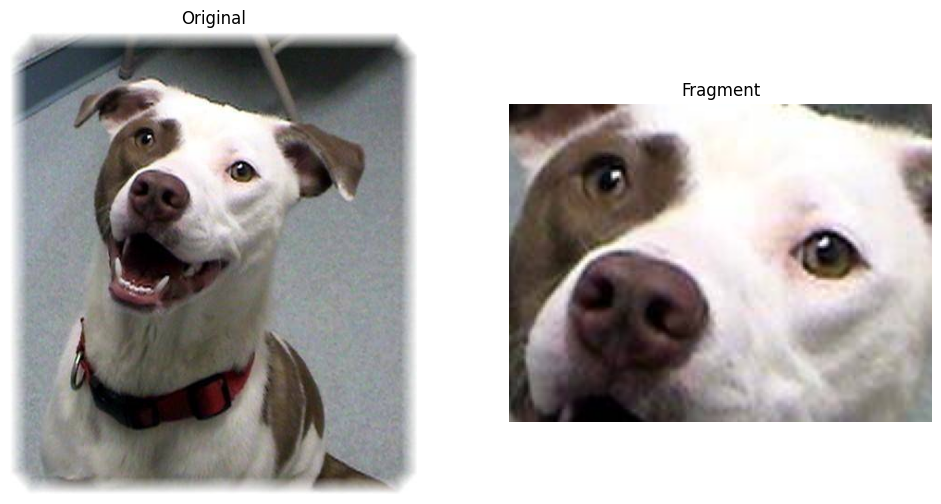

In [7]:
for img_key in uploaded:
  im = read_image_from_bytes(uploaded[img_key])

  fragment = extract_fragment(image=im)

  plt.figure(figsize=(12, 6))

  # Original image
  plt.subplot(1, 2, 1)
  plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
  plt.axis("off")
  plt.title("Original")

  # Correction
  plt.subplot(1, 2, 2)
  plt.imshow(cv2.cvtColor(fragment, cv2.COLOR_BGR2RGB))
  plt.axis("off")
  plt.title("Fragment")

  # Display only one fragment
  break

##2. Image Fusing

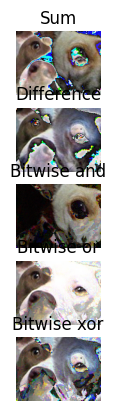

In [22]:
# Some hardcoded keys
image0_key = "dog.101.jpg"
image1_key = "dog.104.jpg"

image0 = extract_fragment(read_image_from_bytes(uploaded[image0_key]))
image1 = extract_fragment(read_image_from_bytes(uploaded[image1_key]))


fused_images = [{
    "title": "Sum",
    "image": image0 + image1
}, {
    "title": "Difference",
    "image": np.abs(image0 - image1)
}, {
    "title": "Bitwise and",
    "image": cv2.bitwise_and(image0, image1)
}, {
    "title": "Bitwise or",
    "image": cv2.bitwise_or(image0, image1)
}, {
    "title": "Bitwise xor",
    "image": cv2.bitwise_xor(image0, image1)
}]

f, plt_array = plt.subplots(len(fused_images), 1)

for idx, fused_image in enumerate(fused_images):
  plt_array[idx].imshow(cv2.cvtColor(fused_image["image"], cv2.COLOR_BGR2RGB))
  plt_array[idx].axis("off")
  plt_array[idx].title.set_text(fused_image["title"])
